# K-nearest Neighbours

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

## Import data and create dataframe

In [51]:
df = pd.read_csv("/workspaces/josefina-aispuro-merelles-machine-learning/data/raw/winequality-red.csv", sep = ";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Descriptive Analysis

In [52]:
# Check the dimensions
df.shape

(1599, 12)

In [53]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [54]:
# Generate a statistical summary of numerical columns and transpose it for readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Observations
- There are 1599 rows and 12 columns.
- No missing values.
- The data contains only numerical features.

## Data Cleaning

In [55]:
# Looking for duplicated data
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [56]:
# Dropping duplicates if True
if df.duplicated().sum():
        df = df.drop_duplicates()
        
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Observations
We removed 240 duplicated rows.

## Visualization

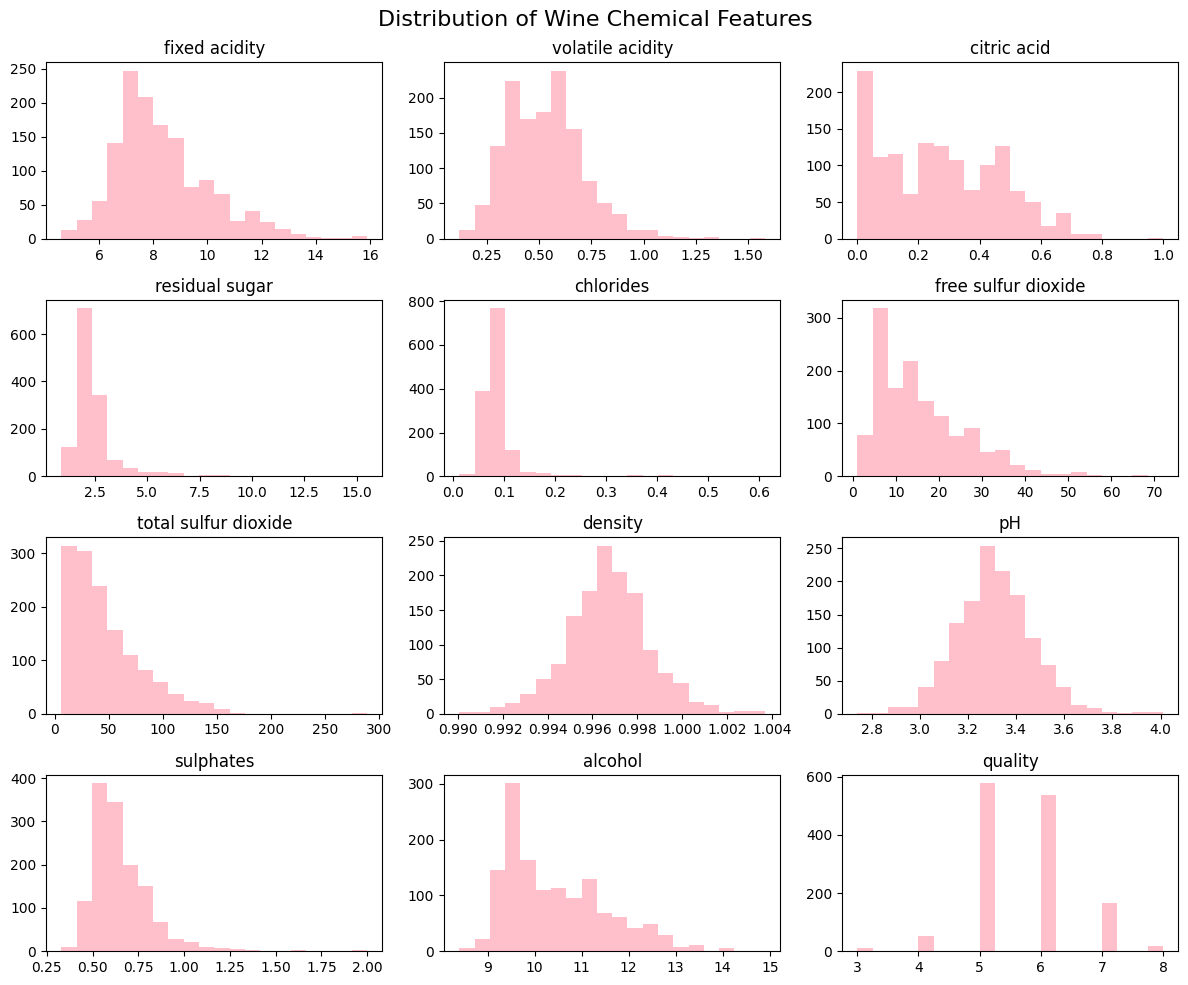

In [57]:
# Histogram
df.hist(figsize=(12, 10), bins=20, grid=False, color="pink")
plt.suptitle("Distribution of Wine Chemical Features", fontsize=16)

plt.tight_layout()
plt.show()

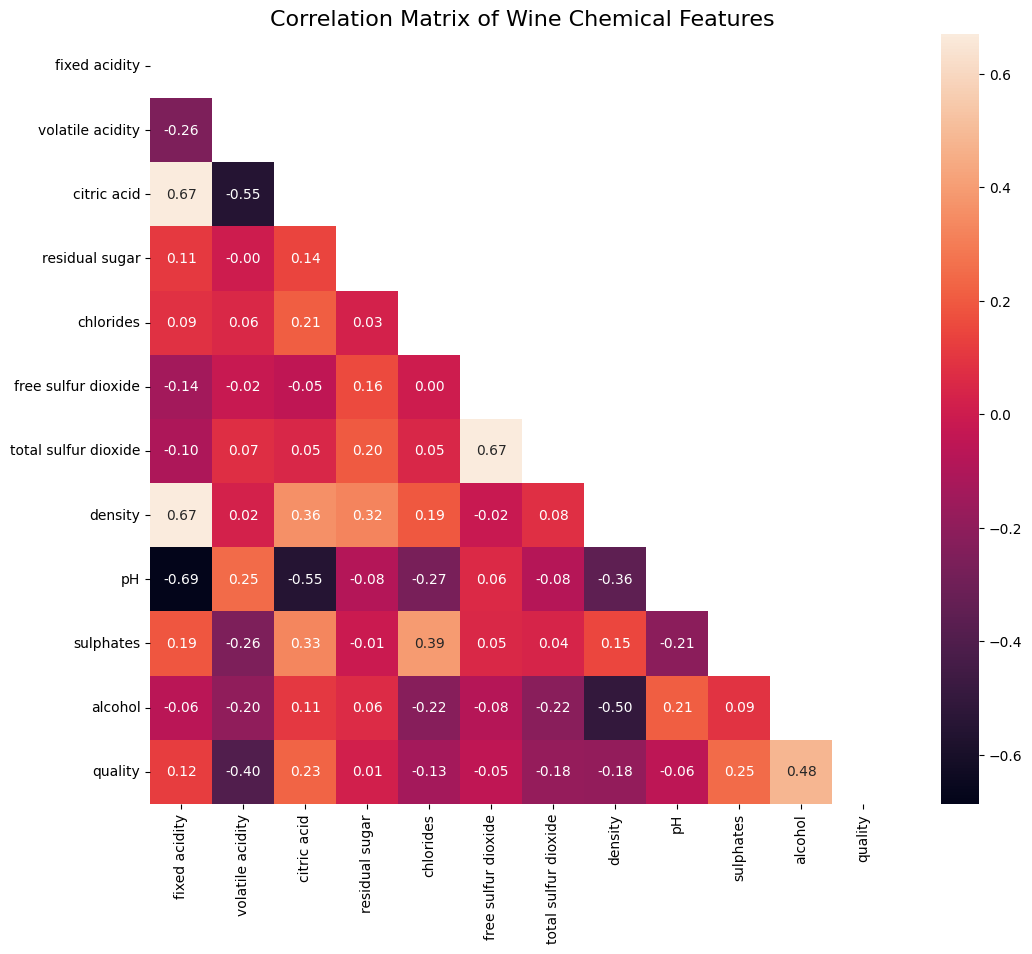

In [58]:
# Heatmap
plt.figure(figsize=(12, 10))
correlation = df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))

sns.heatmap(correlation, mask=mask, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Wine Chemical Features", fontsize=16)

plt.show()

### Observations
The histograms show that most wine samples have a quality of 5 and 6, with very few at the extremes (3, 4, 7, 8). The heatmap reveals a few strong correlations between features, such as citric acid and fixed acidity (0.67), pH and fixed acidity (-0.69), and total sulfur dioxide and free sulfur dioxide (0.67). Most other correlations are weak, and the strongest correlation with the target quality is alcohol (0.48). Despite some high correlations between features, we do not drop any variables.

In [59]:
# Grouping wine quality into 3 classes: 0 = low (3, 4), 1 = medium (5, 6), 2 = high (7, 8)
df["label"] = df["quality"].apply(lambda q: 0 if q <= 4 else (1 if q <= 6 else 2))

/tmp/ipykernel_8716/2048992055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["quality"].apply(lambda q: 0 if q <= 4 else (1 if q <= 6 else 2))


In [60]:
# Dropping original column
df.drop("quality", axis=1, inplace=True)

/tmp/ipykernel_8716/3256917216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("quality", axis=1, inplace=True)


In [61]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1


## Train / Test Split

In [62]:
# Define X (features) and y (target)
X = df.drop(columns = ["label"])
y = df["label"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [63]:
# Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

X_train_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1016,0.351623,-0.828323,0.648771,-0.238440,-0.411606,-0.362070,-0.566298,-0.986612,-0.259822,0.519851,1.984240
1519,-0.981548,0.965891,-0.989833,0.054589,0.312800,-0.168479,-0.596342,-0.025508,0.857267,-0.458489,-0.215867
452,-0.865620,0.180922,-1.245865,-0.604727,-0.106593,0.218703,-0.355992,0.055032,0.857267,-0.170742,-0.399209
847,-0.517836,0.853753,-0.580182,-0.531470,-0.220973,-0.362070,-0.235817,0.538268,1.251534,0.232104,-0.490880
58,-0.285980,0.349130,-0.477769,-0.165183,-0.259100,0.121907,0.214839,0.430882,0.791556,-0.400940,-0.399209


## Creating model and training data

In [64]:
# Create the model
model = KNeighborsClassifier()

# Train the model
model.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## Predictions

In [65]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1])

In [66]:
# Evaluate accuracy
model_accuracy = accuracy_score(y_test, y_pred)
model_accuracy

0.8198529411764706

### Observations
The decision tree model achieved 81.98% accuracy on the test set.

## Optimization

In [87]:
# Hyperparameters to test
hyperparameters = {"n_neighbors": [3, 5, 7, 9, 11, 13],
                   "weights": ["uniform", "distance"],
                   "metric": ["euclidean", "manhattan", "minkowski"]}

# Initialize the grid search
grid_search = GridSearchCV(KNeighborsClassifier(), hyperparameters, scoring="accuracy", cv=5)
grid_search

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [88]:
# Train Grid Search
grid_search.fit(X_train_scaled, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,13


In [89]:
# Looking for best parameters
grid_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}

In [90]:
# Evaluate optimized model on the test set
grid_model = grid_search.best_estimator_
test_accuracy = grid_model.score(X_test_scaled, y_test)
test_accuracy

0.8602941176470589

### Observations
After hyperparameter tuning, the model achieved a test accuracy of 86.02%, improving from the initial 81.98%. Hyperparameter optimization helped the model generalize better.

## Saving model

In [93]:
# Hyperparameters to test
hyperparameters = {"n_neighbors": [3, 5, 7, 9, 11, 13, 15, 17],
                   "weights": ["uniform", "distance"],
                   "metric": ["euclidean", "manhattan", "minkowski", "chebyshev", "cosine"]}

# Initialize the grid search
grid_search = GridSearchCV(KNeighborsClassifier(), hyperparameters, scoring="accuracy", cv=5)
grid_search

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [94]:
# Train Grid Search
grid_search.fit(X_train_scaled, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,17


In [95]:
# Looking for best parameters
grid_search.best_params_

{'metric': 'cosine', 'n_neighbors': 17, 'weights': 'distance'}

In [96]:
# Evaluate optimized model on the test set
grid_model = grid_search.best_estimator_
test_accuracy = grid_model.score(X_test_scaled, y_test)
test_accuracy

0.8529411764705882